# Load libraries and import datasets

In [68]:
# Import the pandas library as pd for data manipulation
import pandas as pd

# Import the numpy library as np for numerical operations
import numpy as np

# Import the seaborn library as sns for statistical data visualization
import seaborn as sns

# Import the matplotlib.pyplot module as plt for plotting graphs and visualizations
import matplotlib.pyplot as plt

In [69]:
#Read the CSV files into pandas DataFrames
students_math=pd.read_csv('student-mat.csv', sep=';')
students_port=pd.read_csv('student-por.csv', sep=';')

print(students_math.head())
print(students_port.head())

                                              school  sex  age  address  \
0  GP;"F";18;"U";"GT3";"A";4;4;"at_home";"teacher...  NaN  NaN      NaN   
1  GP;"F";17;"U";"GT3";"T";1;1;"at_home";"other";...  NaN  NaN      NaN   
2  GP;"F";15;"U";"LE3";"T";1;1;"at_home";"other";...  NaN  NaN      NaN   
3  GP;"F";15;"U";"GT3";"T";4;2;"health";"services...  NaN  NaN      NaN   
4  GP;"F";16;"U";"GT3";"T";3;3;"other";"other";"h...  NaN  NaN      NaN   

   famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  famrel  freetime  goout  \
0      NaN      NaN   NaN   NaN   NaN   NaN  ...     NaN       NaN    NaN   
1      NaN      NaN   NaN   NaN   NaN   NaN  ...     NaN       NaN    NaN   
2      NaN      NaN   NaN   NaN   NaN   NaN  ...     NaN       NaN    NaN   
3      NaN      NaN   NaN   NaN   NaN   NaN  ...     NaN       NaN    NaN   
4      NaN      NaN   NaN   NaN   NaN   NaN  ...     NaN       NaN    NaN   

   Dalc  Walc  health  absences  G1  G2  G3  
0   NaN   NaN     NaN       NaN NaN NaN 

In [70]:
#Check the structure and summary of the datasets before merging them together
print(students_math.info())
print(students_port.info())
print(students_math.describe())
print(students_port.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         0 non-null      float64
 2   age         0 non-null      float64
 3   address     0 non-null      float64
 4   famsize     0 non-null      float64
 5   Pstatus     0 non-null      float64
 6   Medu        0 non-null      float64
 7   Fedu        0 non-null      float64
 8   Mjob        0 non-null      float64
 9   Fjob        0 non-null      float64
 10  reason      0 non-null      float64
 11  guardian    0 non-null      float64
 12  traveltime  0 non-null      float64
 13  studytime   0 non-null      float64
 14  failures    0 non-null      float64
 15  schoolsup   0 non-null      float64
 16  famsup      0 non-null      float64
 17  paid        0 non-null      float64
 18  activities  0 non-null      float64
 19  nursery     0 non-null      f

# Note found on readme for data sets:
> _Additional note:_ there are several (382) students that belong to both datasets .
These students can be identified by searching for identical attributes
that characterize each student

In [71]:
#Merge datasets on attribute "invariant" columns to only keep the same students present in both datasets
student_merged=pd.merge(students_math, students_port, how='inner', on=['school', 'sex','age','address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob','reason','nursery','internet'])

print(student_merged.info())

ValueError: You are trying to merge on float64 and object columns. If you wish to proceed you should use pd.concat

In [ ]:
student_merged.to_csv('student_merged.csv', index=False)

NameError: name 'student_merged' is not defined

Range of each numeric variable:
 age              7
Medu             4
Fedu             4
traveltime_x     3
studytime_x      3
failures_x       3
famrel_x         4
freetime_x       4
goout_x          4
Dalc_x           4
Walc_x           4
health_x         4
absences_x      75
G1_x            16
G2_x            19
G3_x            20
traveltime_y     3
studytime_y      3
failures_y       3
famrel_y         4
freetime_y       4
goout_y          4
Dalc_y           4
Walc_y           4
health_y         4
absences_y      32
G1_y            19
G2_y            14
G3_y            19
dtype: int64

Variance of each numeric variable:
 age              1.377032
Medu             1.180223
Fedu             1.201742
traveltime_x     0.483551
studytime_x      0.715374
failures_x       0.532142
famrel_x         0.849384
freetime_x       0.976605
goout_x          1.281259
Dalc_x           0.785402
Walc_x           1.645745
health_x         1.961008
absences_x      58.144453
G1_x            11.216920
G2

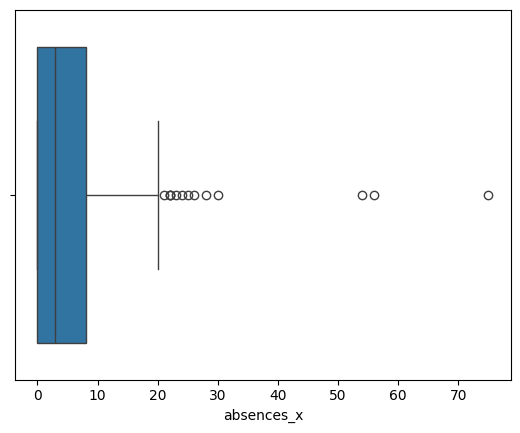

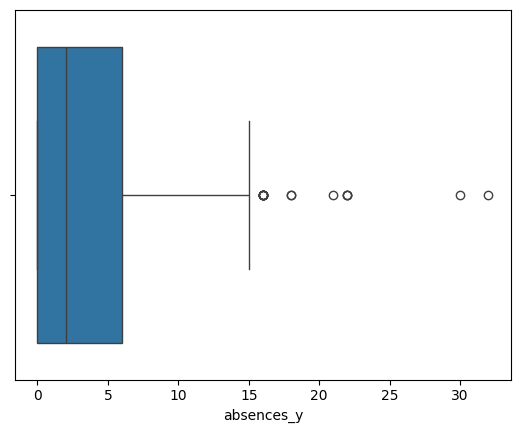

In [ ]:
#Find outliers for numeric values
numeric_cols = student_merged.select_dtypes(include=['int64', 'float64']).columns
# Calculate the range (maximum - minimum) for each numeric variable
range_values = student_merged[numeric_cols].max() - student_merged[numeric_cols].min()
print("Range of each numeric variable:\n", range_values)
# Calculate the variance for each numeric variable
variance_values = student_merged[numeric_cols].var()
print("\nVariance of each numeric variable:\n", variance_values)

plt.figure(); sns.boxplot(x=student_merged['absences_x']); plt.show()
plt.figure(); sns.boxplot(x=student_merged['absences_y']); plt.show()

# Cap values of 'absences_x' and 'absences_y' at their 95th percentile to reduce the effect of outliers
cap_value_x = student_merged['absences_x'].quantile(0.95)
cap_value_y = student_merged['absences_y'].quantile(0.95)

student_merged['absences_x'] = student_merged['absences_x'].clip(upper=cap_value_x)
student_merged['absences_y'] = student_merged['absences_y'].clip(upper=cap_value_y)

In [ ]:
all_columns = student_merged.columns
# Identify categorical columns by excluding numeric columns
categorical_cols = all_columns.difference(numeric_cols)
print(categorical_cols)
# Apply one-hot encoding
student_merged_encoded = pd.get_dummies(
    student_merged,
    columns=categorical_cols,
    drop_first=True
)
student_merged_encoded = student_merged_encoded.astype(int)
print(student_merged_encoded.head(2))

print(student_merged_encoded['Fjob_services'].head())

Index(['Fjob', 'Mjob', 'Pstatus', 'activities_x', 'activities_y', 'address',
       'famsize', 'famsup_x', 'famsup_y', 'guardian_x', 'guardian_y',
       'higher_x', 'higher_y', 'internet', 'nursery', 'paid_x', 'paid_y',
       'reason', 'romantic_x', 'romantic_y', 'school', 'schoolsup_x',
       'schoolsup_y', 'sex'],
      dtype='object')
   age  Medu  Fedu  traveltime_x  studytime_x  failures_x  famrel_x  \
0   18     4     4             2            2           0         4   
1   17     1     1             1            2           0         5   

   freetime_x  goout_x  Dalc_x  ...  paid_y_yes  reason_home  reason_other  \
0           3        4       1  ...           0            0             0   
1           3        3       1  ...           0            0             0   

   reason_reputation  romantic_x_yes  romantic_y_yes  school_MS  \
0                  0               0               0          0   
1                  0               0               0          0   

   sch

In [ ]:
student_merged_encoded.to_csv('student_merged_encoded.csv', index=False)

In [ ]:
#Check for inconsistencies in responses from the same students in both datasets

#Check for inconsistencies in 'guardian' (Guardian)
is_guardian_same = (student_merged['guardian_x'] == student_merged['guardian_y']).all()
print(f"Are 'guardian_x' and 'guardian_y' (guardian) identical in all rows?  {is_guardian_same}")

#Check for inconsistencies in 'Dalc' (Alcohol consumption during weekdays)
is_dalc_same = (student_merged['Dalc_x'] == student_merged['Dalc_y']).all()
print(f"Are 'Dalc_x' and 'Dalc_y' (Alcohol consumption during weekdays) identical in all rows?  {is_dalc_same}")

#Count number of rows where 'guardian' and 'Dalc' differ
guardian_diff = (student_merged['guardian_x'] != student_merged['guardian_y']).sum()
dalc_diff = (student_merged['Dalc_x'] != student_merged['Dalc_y']).sum()
print(f"Number of rows where 'guardian' is different: {guardian_diff}")
print(f"Number of rows where 'Dalc' is different: {dalc_diff}")

Are 'guardian_x' and 'guardian_y' (guardian) identical in all rows?  False
Are 'Dalc_x' and 'Dalc_y' (Alcohol consumption during weekdays) identical in all rows?  False
Number of rows where 'guardian' is different: 6
Number of rows where 'Dalc' is different: 5


## Students report different things for each survey, columns cannot be merged. Each columns will be treated separetely

# Identify at _risk students_

In [ ]:

# we have 'at_risk_math' and at_risk_port' as our target variables (G3_x and G3_y for final grades in math and portuguese respectively)
#G3 - final grade (numeric: from 0 to 20) if less than 10 - at risk of failing

# Condition: Is student_merged['G3_x'] < 10?
# If True:  set value to 1 (At Risk)
# If False: set value to 0 (Not At Risk)

student_merged['at_risk_math'] = np.where(student_merged['G3_x'] < 10, 1, 0)
student_merged['at_risk_port'] = np.where(student_merged['G3_y'] < 10, 1, 0)

# Combine 'at_risk_total' column for visualization

def set_at_risk_total(row):
    if row['at_risk_math'] == 1 and row['at_risk_port'] == 1:
        return 'At Risk (Both)'
    elif row['at_risk_math'] == 1:
        return 'At Risk (Math Only)'
    elif row['at_risk_port'] == 1:
        return 'At Risk (Port Only)'
    else:
        return 'Not At Risk'

student_merged['at_risk_total'] = student_merged.apply(set_at_risk_total, axis=1)


print("\n--- Target Variable Creation ---")
print("Breakdown of 'at_risk_math':")
print(student_merged['at_risk_math'].value_counts())

print("\nBreakdown of 'at_risk_port':")
print(student_merged['at_risk_port'].value_counts())

print("\nBreakdown of 'at_risk_total':")
print(student_merged['at_risk_total'].value_counts())


--- Target Variable Creation ---
Breakdown of 'at_risk_math':
at_risk_math
0    255
1    127
Name: count, dtype: int64

Breakdown of 'at_risk_port':
at_risk_port
0    350
1     32
Name: count, dtype: int64

Breakdown of 'at_risk_total':
at_risk_total
Not At Risk            246
At Risk (Math Only)    104
At Risk (Both)          23
At Risk (Port Only)      9
Name: count, dtype: int64


# Create cleaned dataset ready for visualization

In [ ]:
# Create cleaned dataset ready for visualization
# These are the columns  used to merge. They are the 'invariant' attributes.
invariant_features = [
    'school', 'sex', 'age', 'address', 'famsize', 'Pstatus',
    'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'nursery', 'internet'
]

# These are the 'variant' attributes related to the Math class (_x)
math_features = [
    'guardian_x', 'traveltime_x', 'studytime_x', 'failures_x', 'schoolsup_x',
    'famsup_x', 'paid_x', 'activities_x', 'higher_x', 'romantic_x', 'famrel_x',
    'freetime_x', 'goout_x', 'Dalc_x', 'Walc_x', 'health_x', 'absences_x'
]

# These are the 'variant' attributes related to the Portuguese class (_y)
port_features = [
    'guardian_y', 'traveltime_y', 'studytime_y', 'failures_y', 'schoolsup_y',
    'famsup_y', 'paid_y', 'activities_y', 'higher_y', 'romantic_y', 'famrel_y',
    'freetime_y', 'goout_y', 'Dalc_y', 'Walc_y', 'health_y', 'absences_y'
]

# These are the grade and target columns
target_features = [
    'G1_x', 'G2_x', 'G3_x', 'G1_y', 'G2_y', 'G3_y',
    'at_risk_math', 'at_risk_port', 'at_risk_total'
]

print("\n--- Feature Lists Created ---")
print(f"Invariant Features ({len(invariant_features)})")
print(f"Math-Specific Features ({len(math_features)})")
print(f"Portuguese-Specific Features ({len(port_features)})")


--- Feature Lists Created ---
Invariant Features (13)
Math-Specific Features (17)
Portuguese-Specific Features (17)


In [ ]:
student_merged.to_csv('student_merged_cleaned.csv', index=False)

# **Data Visualization**

Text(0.5, 102.72222222222219, 'Grades')

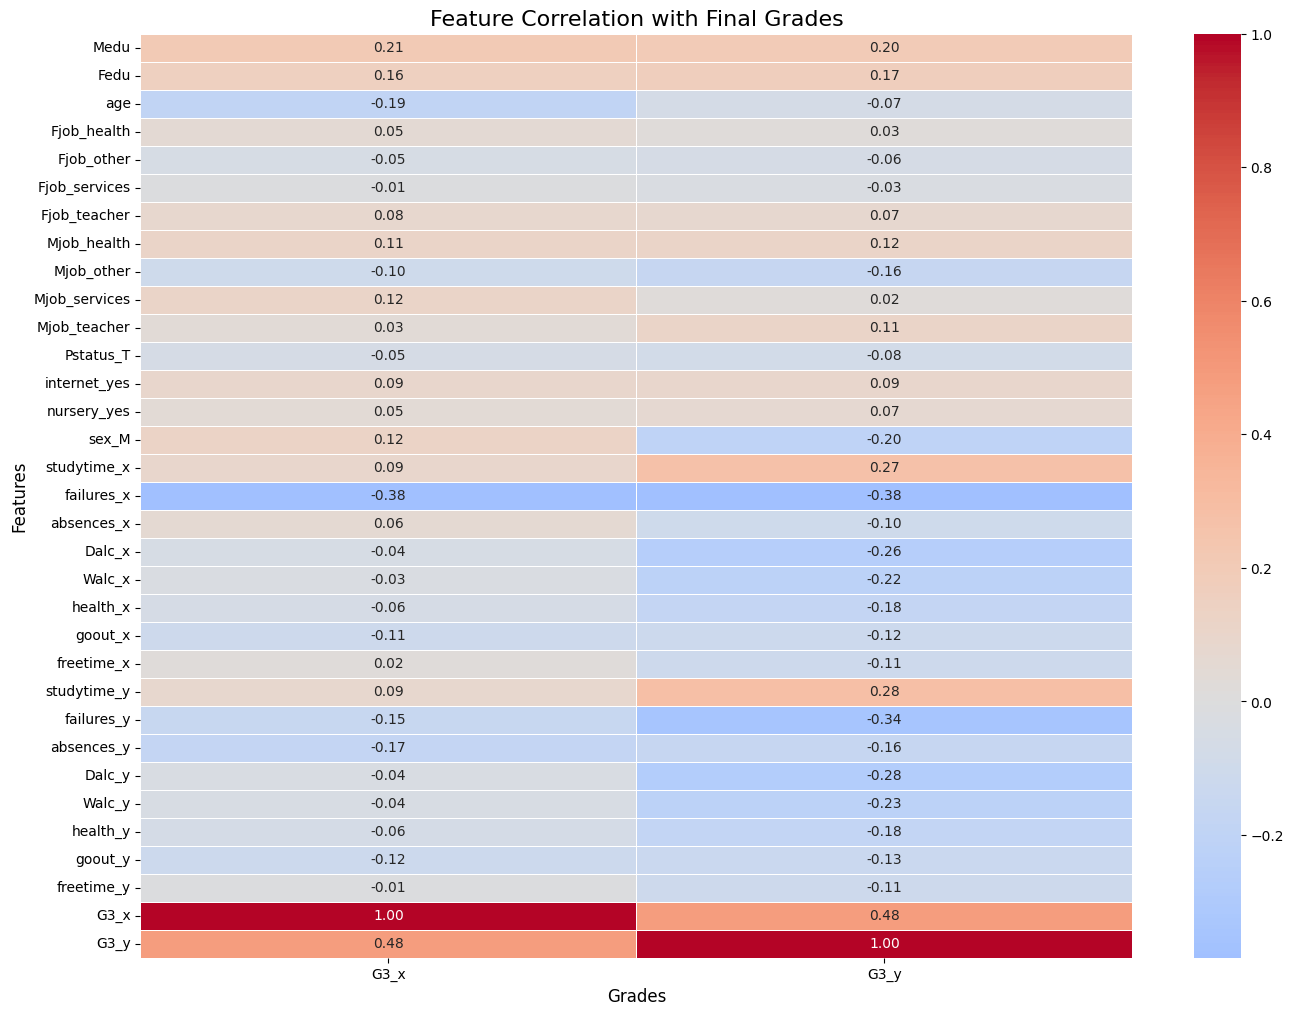

In [ ]:
#Draw a heatmap to visualize the correlation of invariant and variant features with final grades
# Select key features: invariant, variant, and targets
invariant_features_sel =  ['Medu', 'Fedu', 'age'] + \
                         [col for col in student_merged_encoded.columns if col.startswith(('Mjob_', 'Fjob_', 'Pstatus_', 'sex_', 'nursery_', 'internet_'))]

variant_features_x_sel = ['studytime_x', 'failures_x', 'absences_x', 'Dalc_x', 'Walc_x', 'health_x', 'goout_x', 'freetime_x']
variant_features_y_sel = ['studytime_y', 'failures_y', 'absences_y', 'Dalc_y', 'Walc_y', 'health_y', 'goout_y', 'freetime_y']
targets = ['G3_x', 'G3_y']  # G3_mat and G3_por
features_for_corr = invariant_features_sel + variant_features_x_sel + variant_features_y_sel + targets
df_corr = student_merged_encoded[features_for_corr]
# Calculate the correlation matrix
corr_matrix = df_corr.corr()
corr_with_targets = corr_matrix[targets]

plt.figure(figsize=(16,12))
# Draw the heatmap
sns.heatmap(
    corr_with_targets,       # Correlations of features with G3_x and G3_y
    annot=True,              # Show correlation values
    fmt=".2f",
    cmap="coolwarm",         # Color map for positive/negative correlation
    center=0,                # Center at 0 (neutral correlation)
    linewidths=0.5
)
plt.title("Feature Correlation with Final Grades", fontsize=16)
plt.ylabel("Features", fontsize=12)
plt.xlabel("Grades", fontsize=12)

# **Basic stats and plots**

*Average grades by school*

average final grades for math per school
['GP' 'MS']
school
GP    10.494152
MS     9.475000
Name: G3_x, dtype: float64
T-statistic: 1.307, P-value: 0.197


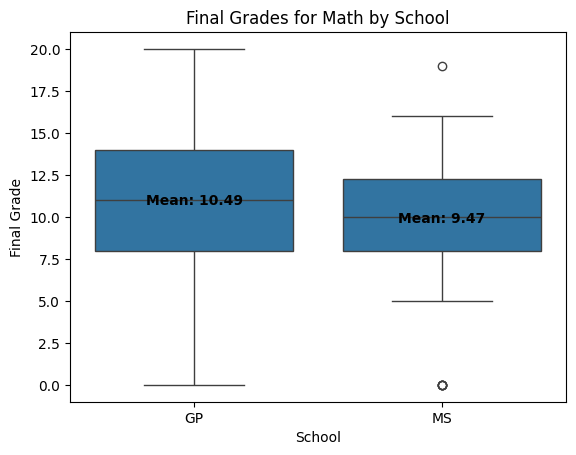

average final grades for Portugese per school
school
GP    12.69883
MS    10.95000
Name: G3_y, dtype: float64
T-statistic: 2.316, P-value: 0.025


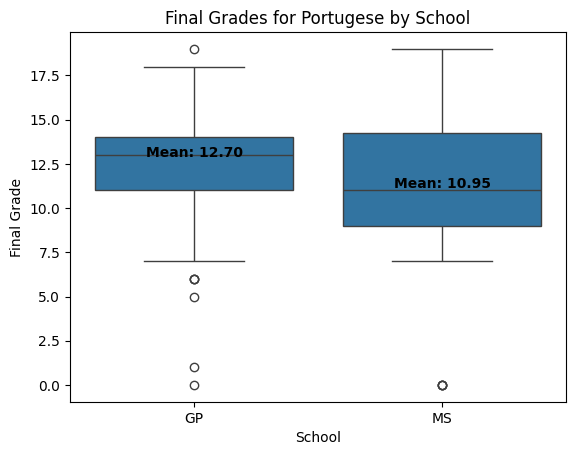

In [ ]:
from scipy import stats
#average student performance by school to analynse any variances
students_all = pd.read_csv("student_merged_cleaned.csv")
print("average final grades for math per school")
print(students_all['school'].unique())

# Group means by school for math
print(students_all.groupby('school')['G3_x'].mean())
# Compare statistically
school1 = students_all[students_all['school'] == students_all['school'].unique()[0]]['G3_x']
school2 = students_all[students_all['school'] == students_all['school'].unique()[1]]['G3_x']
t_stat, p_val = stats.ttest_ind(school1, school2, equal_var=False)
print(f"T-statistic: {t_stat:.3f}, P-value: {p_val:.3f}")

# Visualize with Boxplot
sns.boxplot(data=students_all, x='school', y='G3_x')
means = students_all.groupby('school')['G3_x'].mean()
for i, mean in enumerate(means):
    plt.text(i, mean + 0.2, f'Mean: {mean:.2f}', ha='center', color='black', weight='bold')

plt.title('Final Grades for Math by School')
plt.xlabel('School')
plt.ylabel('Final Grade')
plt.show()

# Group means by school for Portuguese
print("average final grades for Portuguese per school")
print(students_all.groupby('school')['G3_y'].mean())
# Compare statistically
school3 = students_all[students_all['school'] == students_all['school'].unique()[0]]['G3_y']
school4 = students_all[students_all['school'] == students_all['school'].unique()[1]]['G3_y']

t_stat, p_val = stats.ttest_ind(school3, school4, equal_var=False)
print(f"T-statistic: {t_stat:.3f}, P-value: {p_val:.3f}")

# Visualize with Boxplot
sns.boxplot(data=students_all, x='school', y='G3_y')
means = students_all.groupby('school')['G3_y'].mean()
for i, mean in enumerate(means):
    plt.text(i, mean + 0.2, f'Mean: {mean:.2f}', ha='center', color='black', weight='bold')

plt.title('Final Grades for Portuguese by School')
plt.xlabel('School')
plt.ylabel('Final Grade')
plt.show()

interpretation: Overall, GP school has better grades. 
For math the variance is acceptable.
However, for Portuguese the P-value is significant

*Comparision based on gender*

['F' 'M']
sex
F     9.838384
M    10.978261
Name: G3_x, dtype: float64


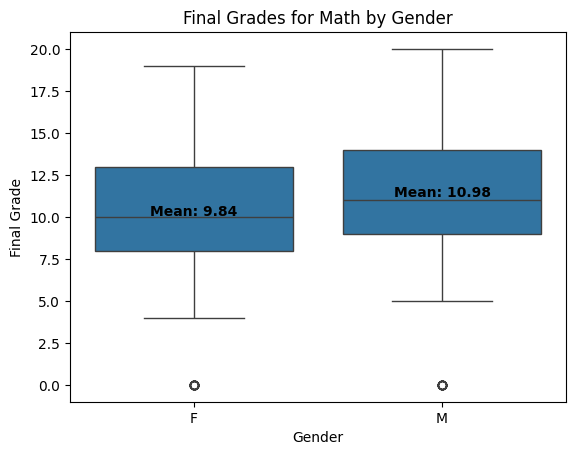

['F' 'M']
sex
F    13.085859
M    11.902174
Name: G3_y, dtype: float64


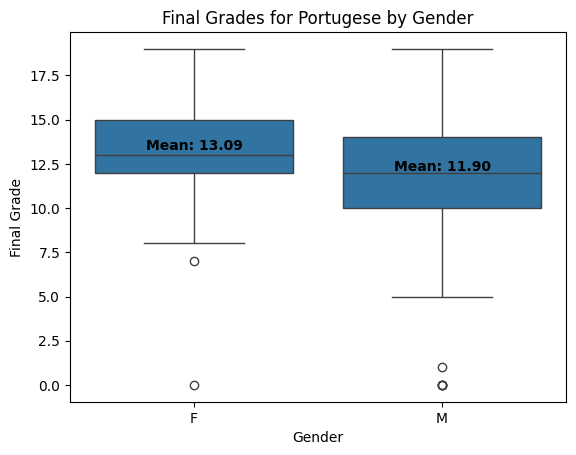

In [ ]:
#is the perfromance affected by the gender of the student?
#1. Math
print(students_all['sex'].unique())
print(students_all.groupby('sex')['G3_x'].mean())
sns.boxplot(data=students_all, x='sex', y='G3_x')
means = students_all.groupby('sex')['G3_x'].mean()
for i, mean in enumerate(means):
    plt.text(i, mean + 0.2, f'Mean: {mean:.2f}', ha='center', color='black', weight='bold')
plt.title('Final Grades for Math by Gender')
plt.xlabel('Gender')
plt.ylabel('Final Grade')
plt.show()
#2. Portuguese
print(students_all['sex'].unique())
print(students_all.groupby('sex')['G3_y'].mean())
sns.boxplot(data=students_all, x='sex', y='G3_y')
means = students_all.groupby('sex')['G3_y'].mean()
for i, mean in enumerate(means):
    plt.text(i, mean + 0.2, f'Mean: {mean:.2f}', ha='center', color='black', weight='bold')
plt.title('Final Grades for Portuguese by Gender')
plt.xlabel('Gender')
plt.ylabel('Final Grade')
plt.show()

interpretation: Males perform slightly better in Math while Females perform slightly better in Portugese.

*The relationship between study time and performance*

[2 3 1 4]
studytime_x
1    10.097087
2    10.100000
3    11.370968
4    11.259259
Name: G3_x, dtype: float64


C:\Users\noufa\AppData\Local\Temp\ipykernel_24772\2257362965.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=students_all, x='studytime_x', y='G3_x', jitter=True, palette='Set2', size=4)


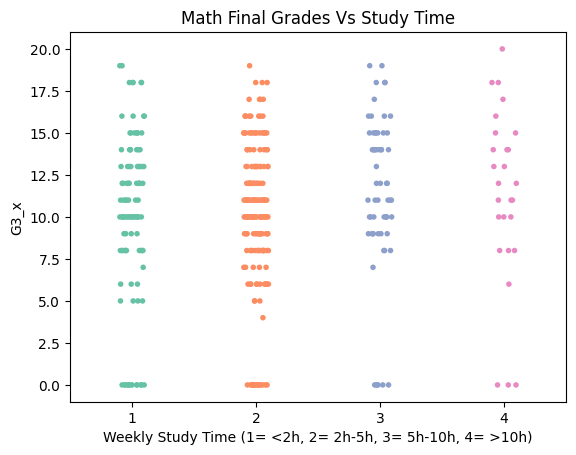

[2 3 1 4]
studytime_y
1    11.147059
2    12.694737
3    13.809524
4    13.407407
Name: G3_y, dtype: float64


C:\Users\noufa\AppData\Local\Temp\ipykernel_24772\2257362965.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=students_all, x='studytime_y', y='G3_y', jitter=True, palette='Set2', size=4)


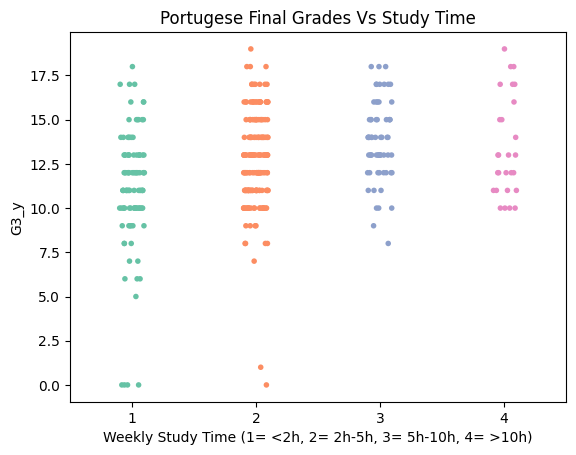

In [ ]:
#How does the studytime affect the final grade?
#1. Math
print(students_all.groupby('studytime_x')['G3_x'].mean())
sns.stripplot(data=students_all, x='studytime_x', y='G3_x', jitter=True, palette='Set2', size=4)
plt.title('Math Final Grades Vs Study Time')
plt.xlabel('Weekly Study Time (1= <2h, 2= 2h-5h, 3= 5h-10h, 4= >10h)')
plt.ylabel('G3_x')
plt.show()
#2. Portuguese
print(students_all.groupby('studytime_y')['G3_y'].mean())
sns.stripplot(data=students_all, x='studytime_y', y='G3_y', jitter=True, palette='Set2', size=4)
plt.title('Portuguese Final Grades Vs Study Time')
plt.xlabel('Weekly Study Time (1= <2h, 2= 2h-5h, 3= 5h-10h, 4= >10h)')
plt.ylabel('G3_y')
plt.show()

Interpretation: Slight increase in final grade with study time

Failures Vs Performance

C:\Users\noufa\AppData\Local\Temp\ipykernel_24772\125118043.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=students_all, x='failures_x', y='G3_x', palette='pastel', inner=None)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[0 3 2 1]
The number of students who failed Math
failures_x
0    316
1     38
2     11
3     17
Name: G3_x, dtype: int64
The average grades per number of failures
failures_x
0    11.240506
1     7.078947
2     4.818182
3     5.529412
Name: G3_x, dtype: float64


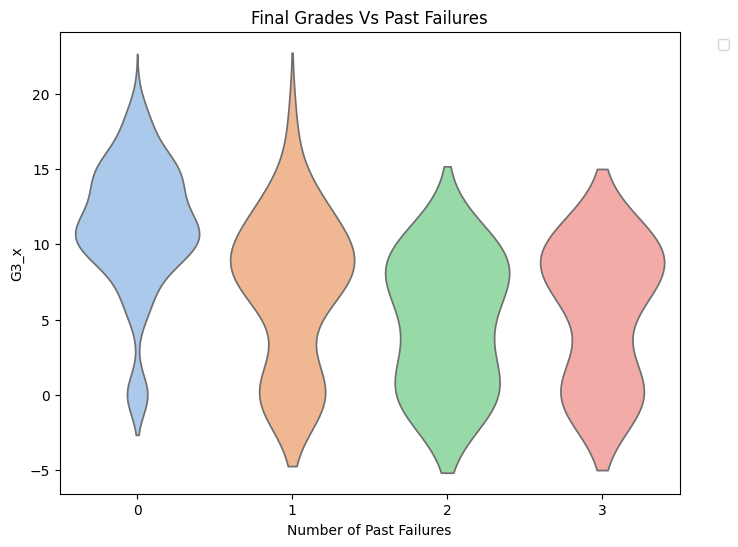

C:\Users\noufa\AppData\Local\Temp\ipykernel_24772\125118043.py:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


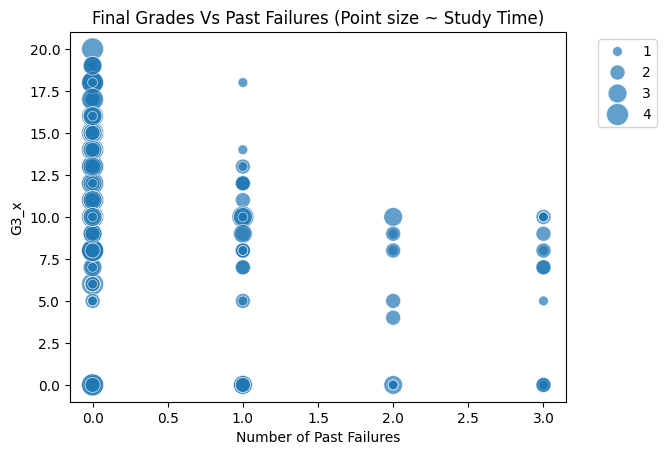

C:\Users\noufa\AppData\Local\Temp\ipykernel_24772\125118043.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=students_all, x='failures_y', y='G3_y', palette='pastel', inner=None)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[0 3 1 2]
The number of students who failed Portugese
failures_y
0    348
1     21
2      6
3      7
Name: G3_y, dtype: int64
The average grades per number of failures
failures_y
0    12.867816
1     9.095238
2     8.166667
3     9.000000
Name: G3_y, dtype: float64


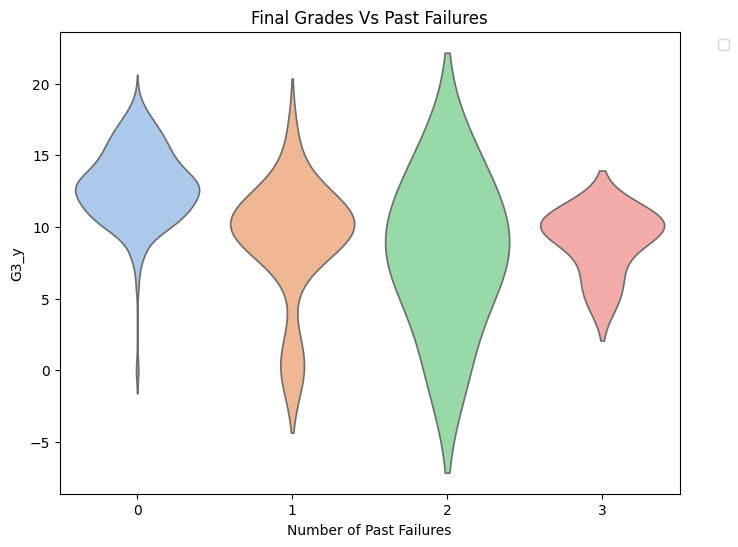

C:\Users\noufa\AppData\Local\Temp\ipykernel_24772\125118043.py:47: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


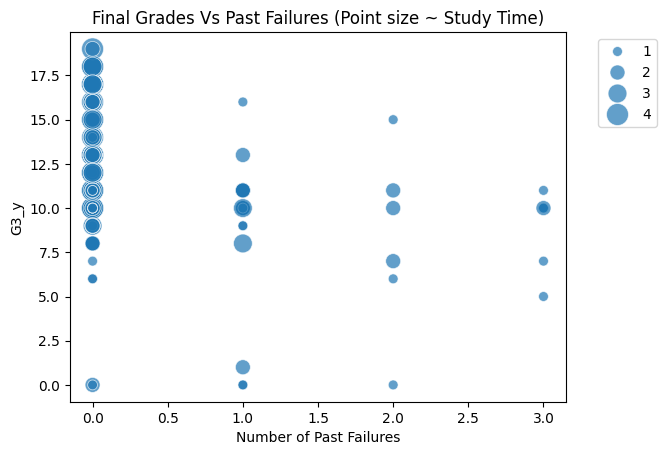

In [ ]:
#How does the studytime affect the failure? and how does it affect the final grade in return?
#1. Math
print("The number of students who failed Math")
print(students_all.groupby('failures_x')['G3_x'].count())
print("The average grades per number of failures")
print(students_all.groupby('failures_x')['G3_x'].mean())
plt.figure(figsize=(8,6))
#violin plot for failures
sns.violinplot(data=students_all, x='failures_x', y='G3_x', palette='pastel', inner=None)
plt.title('Final Grades Vs Past Failures')
plt.xlabel('Number of Past Failures')
plt.ylabel('G3_x')
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
#scatter plot where the point size show the studytime
sns.scatterplot(
    data=students_all,
    x='failures_x',
    y='G3_x',
    size='studytime_x',       # variable size per student
    sizes=(50, 250),        # min/max point size
    palette='Set2',
    alpha=0.7
)
plt.title('Final Grades Vs Past Failures (Point size ~ Study Time)')
plt.xlabel('Number of Past Failures')
plt.ylabel('G3_x')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#2. Portuguese
print("The number of students who failed Portuguese")
print(students_all.groupby('failures_y')['G3_y'].count())
print("The average grades per number of failures")
print(students_all.groupby('failures_y')['G3_y'].mean())
plt.figure(figsize=(8,6))
#violin plot for failures
sns.violinplot(data=students_all, x='failures_y', y='G3_y', palette='pastel', inner=None)
plt.title('Final Grades Vs Past Failures')
plt.xlabel('Number of Past Failures')
plt.ylabel('G3_y')
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
#scatter plot where the point size show the studytime
sns.scatterplot(
    data=students_all,
    x='failures_y',
    y='G3_y',
    size='studytime_y',# variable size per student
    sizes=(50, 250),
    palette='Set2',
    alpha=0.7
)
plt.title('Final Grades Vs Past Failures (Point size ~ Study Time)')
plt.xlabel('Number of Past Failures')
plt.ylabel('G3_y')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

interpretation: The number of failures has a negative impact on the final grade. However, when the study time increase for these  failures the final grade increases.

*Parents education and job impact on students perfomrance*

Medu
0      3
1     51
2     98
3     95
4    135
Name: G3_x, dtype: int64
Fedu
0      2
1     77
2    105
3     99
4     99
Name: G3_x, dtype: int64


C:\Users\noufa\AppData\Local\Temp\ipykernel_24772\4126280535.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  barplot = sns.barplot(data=parent_long, x='Education', y='G3_x', hue='Parent', palette='pastel', ci='sd')


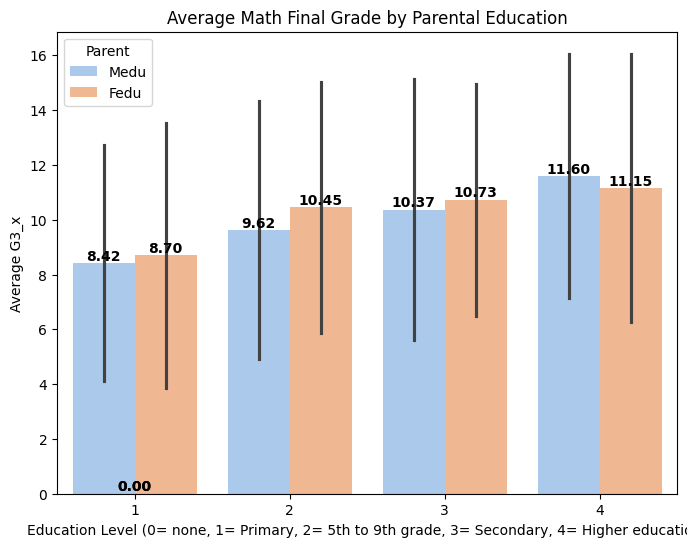

C:\Users\noufa\AppData\Local\Temp\ipykernel_24772\4126280535.py:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  barplot = sns.barplot(data=parent_long2, x='Education', y='G3_y', hue='Parent', palette='pastel', ci='sd')


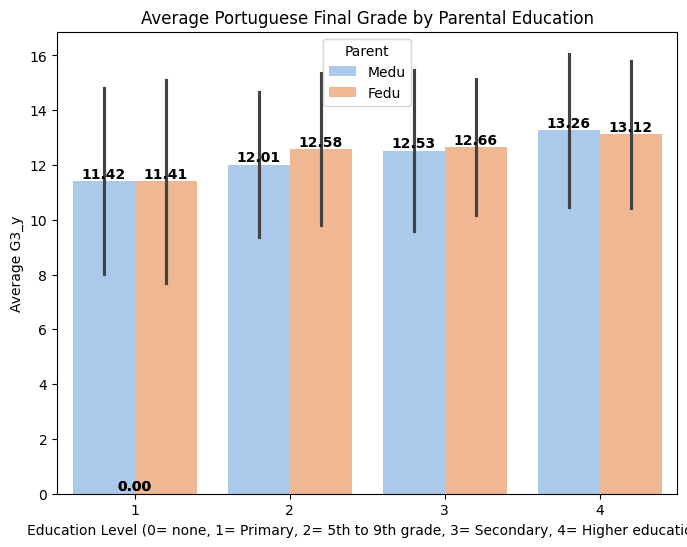

In [78]:
#Does parental education impact the students final grades?
print(students_all.groupby('Medu')['G3_x'].count())
print(students_all.groupby('Fedu')['G3_x'].count())
#this shows us that the number of parents with 0 education is very low which gives false results so we will discard them

#1. Math
parent_df = students_all[['Medu', 'Fedu', 'G3_x']].copy()
parent_df = parent_df[(parent_df['Medu'] > 0) & (parent_df['Fedu'] > 0)]
parent_long = parent_df.melt(id_vars='G3_x', value_vars=['Medu','Fedu'],
                             var_name='Parent', value_name='Education')
plt.figure(figsize=(8,6))
barplot = sns.barplot(data=parent_long, x='Education', y='G3_x', hue='Parent', palette='pastel', ci='sd')
plt.title("Average Math Final Grade by Parental Education")
plt.xlabel("Education Level (0= none, 1= Primary, 2= 5th to 9th grade, 3= Secondary, 4= Higher education)")
plt.ylabel("Average G3_x")

for p in barplot.patches:
    height = p.get_height()
    barplot.annotate(f'{height:.2f}', 
                     (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='bottom', fontsize=10, color='black', weight='bold')

plt.legend(title='Parent')
plt.show()

#2. Portuguese
parent_df2 = students_all[['Medu', 'Fedu', 'G3_y']].copy()
parent_df2 = parent_df2[(parent_df2['Medu'] > 0) & (parent_df2['Fedu'] > 0)]
parent_long2 = parent_df2.melt(id_vars='G3_y', value_vars=['Medu','Fedu'],
                             var_name='Parent', value_name='Education')
plt.figure(figsize=(8,6))
barplot = sns.barplot(data=parent_long2, x='Education', y='G3_y', hue='Parent', palette='pastel', ci='sd')
plt.title("Average Portuguese Final Grade by Parental Education")
plt.xlabel("Education Level (0= none, 1= Primary, 2= 5th to 9th grade, 3= Secondary, 4= Higher education)")
plt.ylabel("Average G3_y")

for p in barplot.patches:
    height = p.get_height()
    barplot.annotate(f'{height:.2f}', 
                     (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='bottom', fontsize=10, color='black', weight='bold')

plt.legend(title='Parent')
plt.show()

Interpretation: Both parents education levels shows a positive impact on the student performance.

C:\Users\noufa\AppData\Local\Temp\ipykernel_24772\3331019421.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  barplot = sns.barplot(data=parent_long, x='Job', y='G3_x', hue='Parent', palette='pastel', ci='sd')


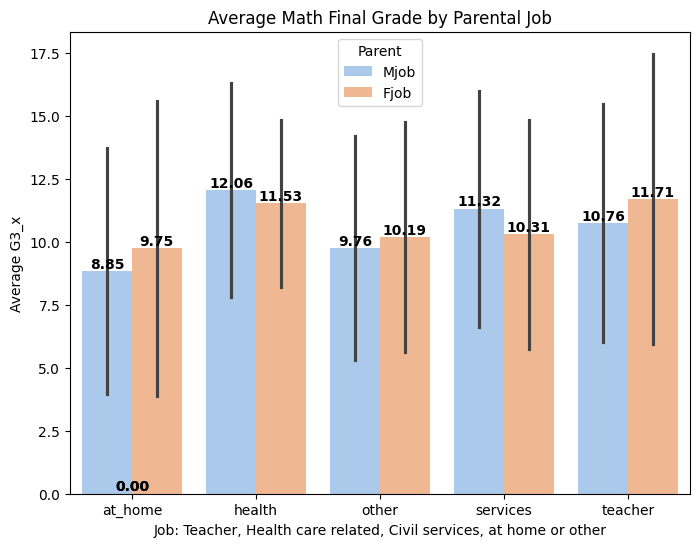

C:\Users\noufa\AppData\Local\Temp\ipykernel_24772\3331019421.py:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  barplot = sns.barplot(data=parent_long2, x='Job', y='G3_y', hue='Parent', palette='pastel', ci='sd')


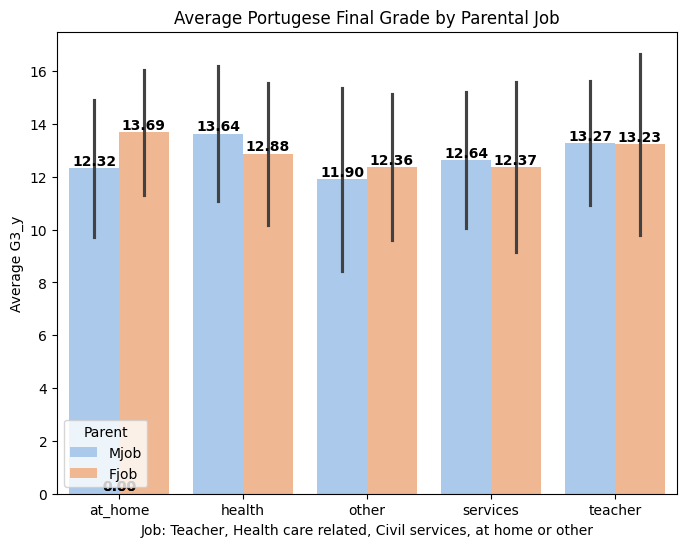

In [85]:
#Does parents Job impact the students final grades?
#1. Math
parent_df = students_all[['Mjob', 'Fjob', 'G3_x']].copy()
parent_long = parent_df.melt(id_vars='G3_x', value_vars=['Mjob','Fjob'],
                             var_name='Parent', value_name='Job')
plt.figure(figsize=(8,6))
barplot = sns.barplot(data=parent_long, x='Job', y='G3_x', hue='Parent', palette='pastel', ci='sd')
plt.title("Average Math Final Grade by Parental Job")
plt.xlabel("Job: Teacher, Health care related, Civil services, at home or other")
plt.ylabel("Average G3_x")
for p in barplot.patches:
    height = p.get_height()
    barplot.annotate(f'{height:.2f}', 
                     (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='bottom', fontsize=10, color='black', weight='bold')

plt.legend(title='Parent')
plt.show()
#2. Portuguese
parent_df2 = students_all[['Mjob', 'Fjob', 'G3_y']].copy()
parent_long2 = parent_df2.melt(id_vars='G3_y', value_vars=['Mjob','Fjob'],
                             var_name='Parent', value_name='Job')
plt.figure(figsize=(8,6))
barplot = sns.barplot(data=parent_long2, x='Job', y='G3_y', hue='Parent', palette='pastel', ci='sd')
plt.title("Average Portugese Final Grade by Parental Job")
plt.xlabel("Job: Teacher, Health care related, Civil services, at home or other")
plt.ylabel("Average G3_y")
for p in barplot.patches:
    height = p.get_height()
    barplot.annotate(f'{height:.2f}', 
                     (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='bottom', fontsize=10, color='black', weight='bold')
plt.legend(title='Parent')
plt.show()

Interpretation: Parents who are at home have a negative impact on students math grades but does not seem to impact Portugese as much. Overall, parental jobs show less impact on student final grades than parental education.